# 04 数据操作 数据预处理

In [1]:
import torch

In [2]:
x = torch.arange(12)
print(x)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [3]:
x.shape

torch.Size([12])

In [5]:
x.numel()

12

In [6]:
x = x.reshape(3, 4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
torch.tensor([[1,2], [3,4]])

tensor([[1, 2],
        [3, 4]])

In [8]:
torch.tensor([1.0, 2, 4, 8])  # 创造浮点数组 

tensor([1., 2., 4., 8.])

In [10]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4, ], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
X.sum()

tensor(66.)

In [18]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [19]:
a = torch.tensor([3.5])
a.item(), float(a)

(3.5, 3.5)

In [40]:
import numpy as np
import pandas as pd
data = np.random.randn(12).reshape(3, 4)
data[2, 2] = np.nan
data = pd.DataFrame(data)
data

,0,1,2,3
0,0.880328,-0.993549,0.505318,-0.193174
1,0.807602,-0.072603,-0.775386,-0.227318
2,0.968191,-0.009449,NaN,-1.186740


In [41]:
data = data.fillna(data.mean())
data

,0,1,2,3
0,0.880328,-0.993549,0.505318,-0.193174
1,0.807602,-0.072603,-0.775386,-0.227318
2,0.968191,-0.009449,-0.135034,-1.186740


In [44]:
data = np.random.randn(12).reshape(3, 4)
data = pd.DataFrame(data)
data['name'] = np.array(['Pave', 'NA', 'NA'])
data

,0,1,2,3,name
0,-0.057792,-0.822247,1.919392,-1.134288,Pave
1,-0.492331,-1.530759,-0.078065,-0.434588,NA
2,-1.314765,2.139398,0.830189,-0.973914,NA


In [45]:
data = pd.get_dummies(data, dummy_na=False)
data

,0,1,2,3,name_NA,name_Pave
0,-0.057792,-0.822247,1.919392,-1.134288,0,1
1,-0.492331,-1.530759,-0.078065,-0.434588,1,0
2,-1.314765,2.139398,0.830189,-0.973914,1,0


# 05 线性代数

In [1]:
import torch
x = torch.arange(24).reshape(2, 3, 4)
y = x.clone()
id(x), id(y)

(1963466121280, 1963466121360)

In [4]:
x.sum(dim=0), x.sum(axis=0)

(tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]))

In [6]:
A = torch.rand(5, 4)
x = torch.rand(4)
torch.mv(A, x)

tensor([0.8054, 1.1660, 0.5680, 1.2312, 0.9003])

In [9]:
A = torch.ones((2, 5, 4))
A.sum(axis=[0, 2], keepdims=True).shape

torch.Size([1, 5, 1])

# 07 自动求导

In [1]:
import torch
x = torch.arange(4.0)
x.requires_grad_(True)
x.grad

In [2]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [8]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [16]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)  # 标量
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

# 08 线性回归 基础优化算法

In [1]:
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))  # 使得y的列数为1

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

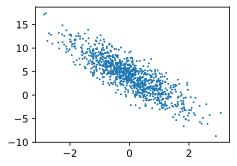

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), 
                labels.numpy(), 1)

In [4]:
def data_iter(batch_size, feature, labels):
    num_examples = len(feature)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7221,  0.0476],
        [ 1.0808, -0.5377],
        [ 0.5470, -1.5788],
        [-2.4469, -0.8892],
        [-1.8430, -1.2357],
        [-1.2258,  1.1608],
        [ 0.6790, -1.8190],
        [ 0.2540, -0.4357],
        [ 0.3793, -0.5972],
        [ 1.1071,  0.2240]]) 
 tensor([[ 2.5999],
        [ 8.1733],
        [10.6568],
        [ 2.3357],
        [ 4.7196],
        [-2.2011],
        [11.7374],
        [ 6.2023],
        [ 6.9763],
        [ 5.6475]])


In [12]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 /2

In [8]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.043278
epoch 2, loss 0.000165
epoch 3, loss 0.000052


In [13]:
# 需要重新随机初始化w, b
lr = 0.001
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 13.247221
epoch 2, loss 10.907807
epoch 3, loss 8.982001
epoch 4, loss 7.396554
epoch 5, loss 6.091275
epoch 6, loss 5.016619
epoch 7, loss 4.131783
epoch 8, loss 3.403196
epoch 9, loss 2.803222
epoch 10, loss 2.309155


## 线性回归简洁实现

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))  # 使得y的列数为1


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [2]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.7868, -0.0518],
         [-0.4159,  0.4754],
         [ 0.2531, -0.1389],
         [ 0.1115,  1.9360],
         [-0.8398, -0.3874],
         [-0.8024,  0.9543],
         [ 0.1199,  0.3589],
         [-0.6030,  1.2758],
         [ 3.3279, -0.3862],
         [-0.7082, -0.3301]]),
 tensor([[ 5.9470],
         [ 1.7422],
         [ 5.1737],
         [-2.1563],
         [ 3.8463],
         [-0.6544],
         [ 3.2308],
         [-1.3518],
         [12.1788],
         [ 3.8960]])]

In [3]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))  # 输入输出维度

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [4]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')        

epoch 1, loss 0.000293
epoch 2, loss 0.000096
epoch 3, loss 0.000096


### 08 QA 尚未完成